## Introduction To Quantum Computing

In [1]:
# !pip install qiskit
# !pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

## 1. Qubit and Gate
양자 컴퓨터의 연산 구성요소는 "큐빗","게이트" 그리고 이들이 어떻게 쓰일지를 기술한 설계도인 "회로"로 나뉘어져 있다.
우선 가장 간단한 회로를 구성해보자. 

In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from math import sqrt, pi
import numpy as np

회로 설계의 기본 프로세스

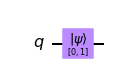

In [2]:
# n 큐빗 짜리 양자 회로 인스턴스 만들기
qc = QuantumCircuit(1) 
# 회로에 게이트 추가하기
initial_state = [0,1]   
qc.initialize(initial_state, 0) 
# 회로 그리기
qc.draw("mpl")  

IBMQ의 어카운트 불러오기

In [3]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account() # Load account from disk
provider = IBMQ.get_provider(hub='ibm-q-kqc', group='kqc-educaiton', project='ey-korea')

<ipython-input-3-e0c3f8fb354a>:4: DeprecationWarning: The package qiskit.providers.ibmq is being deprecated. Please see https://ibm.biz/provider_migration_guide to get instructions on how to migrate to qiskit-ibm-provider (https://github.com/Qiskit/qiskit-ibm-provider) and qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  IBMQ.load_account() # Load account from disk
<ipython-input-3-e0c3f8fb354a>:4: DeprecationWarning: The qiskit.IBMQ entrypoint and the qiskit-ibmq-provider package (accessible from 'qiskit.providers.ibmq`) are deprecated and will be removed in a future release. Instead you should use the qiskit-ibm-provider package which is accessible from 'qiskit_ibm_provider'. You can install it with 'pip install qiskit_ibm_provider'. Just replace 'qiskit.IBMQ' with 'qiskit_ibm_provider.IBMProvider'
  IBMQ.load_account() # Load account from disk


사용할 Backend Device 선택하기

In [4]:
# backend = provider.get_backend("ibmq_kolkata")
# backend = provider.get_backend("ibmq_qasm_simulator")
backend = Aer.get_backend('aer_simulator')

회로를 직접 실행해보기

In [27]:
# 1. 1큐빗 짜리 양자 회로 인스턴스를 만들기
qc = QuantumCircuit(1)  
# 2. [0,1]의 상태를 가지게끔 큐빗을 조정해주기
qc.x(0)
# 3. 회로 그리기
qc.draw("mpl")  
qc.measure_all()
# 시뮬레이터 할당된 일을 시행시킨 뒤 결과를 받아오기
qobj = assemble(qc)    
result = backend.run(qobj).result() 

결과 받아오기

In [6]:
result

Result(backend_name='aer_simulator', backend_version='0.11.2', qobj_id='3ee8d867-5115-4564-b156-8c158ddf3da5', job_id='314a379b-57d2-43b5-913d-dcf6bea85359', success=True, results=[ExperimentResult(shots=1024, success=True, meas_level=2, data=ExperimentResultData(counts={'0x1': 1024}), header=QobjExperimentHeader(clbit_labels=[['meas', 0]], creg_sizes=[['meas', 1]], global_phase=0.0, memory_slots=1, metadata={}, n_qubits=1, name='circuit-91', qreg_sizes=[['q', 1]], qubit_labels=[['q', 0]]), status=DONE, seed_simulator=452988270, metadata={'batched_shots_optimization': False, 'method': 'stabilizer', 'active_input_qubits': [0], 'device': 'CPU', 'remapped_qubits': False, 'num_qubits': 1, 'num_clbits': 1, 'sample_measure_time': 0.0008155, 'input_qubit_map': [[0, 0]], 'measure_sampling': True, 'noise': 'ideal', 'parallel_shots': 1, 'parallel_state_update': 8, 'fusion': {'enabled': False}}, time_taken=0.0027238)], date=2023-03-11T11:41:34.113649, status=COMPLETED, header=None, metadata={'par

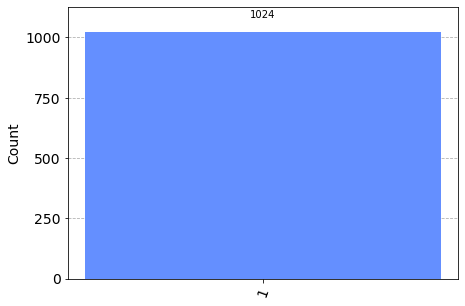

In [7]:
counts = result.get_counts()
plot_histogram(counts)

$\def\cvec#1{\left[\begin{array}{c}#1\end{array}\right]}$
$\def\ket#1{\mid #1 \rangle}$
$\def\bra#1{\langle #1 \mid}$
주어진 상태는 $\cvec{0 \\ 1} =0\times\ket{0}+1\times\ket{1}$이었으므로 100% 확률로 1이 나오는 상태이다.  
이를 $\sqrt{1/2}\ket{0}+\sqrt{1/2}\ket{1}$의 상태로 지정해준 뒤 다시 결과를 살펴보도록 하자. 

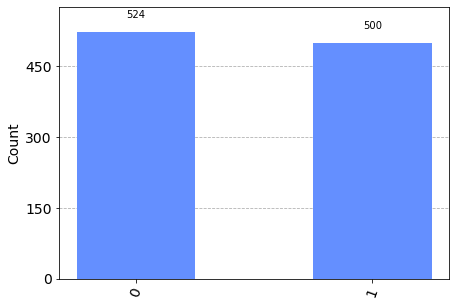

In [8]:
initial_state = [1/sqrt(2), 1/sqrt(2)] 
qc = QuantumCircuit(1) 
qc.initialize(initial_state, 0) 
qc.measure_all()
qobj = assemble(qc)
results = backend.run(qobj).result().get_counts()
plot_histogram(results)        

각 상태가 나올 확률이 대략 5:5 인것을 확인할 수 있다. 
이는 0의 상태와 1의 상태가 $\sqrt{2}$만큼 중첩되어 있는 양자 상태이다.  

좀 더 일반적인 큐빗을 만들기 위해 0이 나올 확률이 $\alpha$가 되는 큐빗을 만들어 보자.

In [9]:
def qc_prob(alpha):
    qc = QuantumCircuit(1,1) 
    initial_state = [np.sqrt(alpha),np.sqrt(1-alpha)]
    qc.initialize(initial_state, 0) 
    qc.measure(0,0)
    return qc

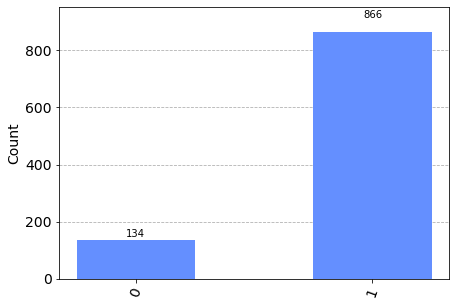

In [10]:
qc = qc_prob(0.14)
qobj = assemble(qc,shots=1000)
results = backend.run(qobj).result().get_counts()
plot_histogram(results) 

- 이때 큐빗은 특정 확률을 따르는 베르누이 분포로 인식할 수 있다. 따라서 위의 경우, 큐빗 상태는 $X \sim Bernoulli(\alpha)$로 인식할 수 있으며 히스토그램은 그 관측값들이라고 볼 수 있다.  

- 양자 컴퓨터의 큐빗은 관측(측정) 전에는 확률적 불안정성이 적은 $\alpha$,파동,양자 비트로 다룰 수 있으나 관측(측정) 후에는 측정에 따른 결과물로만 해석할 수 있는 $\hat{\alpha}$,입자,고전 비트로 변화 시킨다.  

- 이것은 양자컴퓨터가 가진 고유한 성질인 "관측이라는 행위 자체가 물질의 상태를 변화시킨다"로 이해할 수 있다.  

- 양자 역학에서 "측정을 한다"는 것의 정확한 공식은 다음과 같다.  
$$\langle M \rangle = \bra{\psi} M \ket{\psi}$$  

- 여기서 $\ket{\psi}$는 상태를 측정할 큐빗이고 $M$은 이 상태의 어떤 것을 측정할지에 대한 행렬이다. 이를 Observable이라고 부른다.  
양자컴퓨터의 기본적인 Observable은 큐빗이 0이 될지 1이 될지의 확률을 측정하는 것이며 이는 $M = \ket{0}\bra{0}-\ket{1}\bra{1}$으로 정의된다.  

- 이를 통해 0이 될 확률-1이 될 확률을 계산할 수 있다. 

- 좀 더 디테일하게, $\ket{\psi}$가 $0$이 될 확률은 $ \bra{\psi} (\ket{0}\bra{0}) \ket{\psi}$으로 계산된다.  

- \[실제로 위에서 정의된 큐빗이 0을 측정할 확률을 구해보자.\]

## 2. Bloch Sphere

- 큐빗의 Amplitude는 복소수가 될수도 있다. 
- 이는 복소수의 영역에서 $0.5 = \mid \alpha \mid^2$를 만족하는 $\alpha$가 무수히 많기 때문이다.  
- 구체적으로 $\alpha = \sqrt{0.5}e^{i \theta}$에 대해서 어떠한 실수 $\theta$에 대해서 만족한다.  
 
- 따라서 양자 상태 또한 복소수를 가질 수 있으며 이는 $\mathbb{C}^2$인데 $\mathbb{R}^4$와 동치이며 Global Phase Invariance 성질로 인해 실질적 3차원 공간이며 여기에 $\bra{\psi}\ket{\psi}=1$이라는 제약조건이 있기 때문에 구형으로 표현될 수 있다. 

- 정리하자면 하나의 큐빗은 두 가지 각도를 인수로 가지는 구형으로 표현될 수 있으며 이를 Bloch Shere라고 한다. 

$$\ket{\psi} = \cos (\frac{\theta}{2}) \ket{0} + e^{i \phi} \sin (\frac{\theta}{2})\ket{1}$$


In [11]:
def qc_bloch(theta,phi):
    qc = QuantumCircuit(1,1) 
    qc.ry(theta,0)
    qc.rz(phi,0)
    return qc

- 이를 실제로 표현해보자.

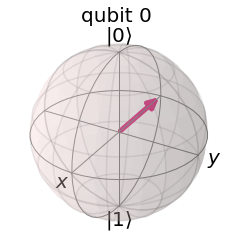

In [32]:
theta = np.pi/2
phi = np.pi
qc = qc_bloch(theta,phi)
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

## 3. Single Qubit Gates

- 양자 컴퓨터의 기본 연산자가 되는 1-Qubit 게이트는 I,X,Y,Z의 Pauli Gate와 H의 Hadamard Gate가 있다.

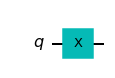

In [13]:
qc = QuantumCircuit(1)
qc.x(0)
qc.draw("mpl")

$$X = \cvec{0 & 1 \\ 1 & 0}$$
$$X \ket{0} = \ket{1} , X \ket{1} = \ket{0}$$

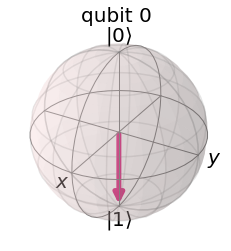

In [14]:
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

X 게이트는 0을 1로 바꿔주는 게이트이다.  
블록 스피어 상에서 X 게이트는 X축 180도 회전을 의미한다.  

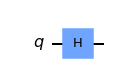

In [15]:
qc = QuantumCircuit(1)
qc.h(0)
qc.draw("mpl")

$$H = \frac{1}{\sqrt{2}}\cvec{1 & 1 \\ 1 & -1}$$
$$H \ket{0} = \frac{1}{\sqrt{2}}(\ket{0}+\ket{1}), H \ket{1} = \frac{1}{\sqrt{2}}(\ket{0}-\ket{1})$$

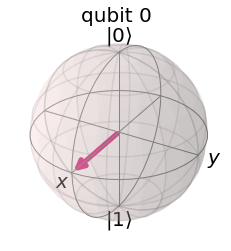

In [16]:
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

하다마드(H) 게이트는 큐빗을 50%확률로 0, 50%확률로 1로 만들어주는 게이트이다.  
블락 스피어 상에서 결과물은 위와 같다. 

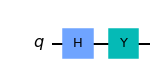

In [17]:
qc = QuantumCircuit(1)
qc.h(0)
qc.y(0)
qc.draw("mpl")

$$Y = \cvec{0 & -i \\ i & 0}$$
$$Y \ket{0} = -i\ket{1}, H \ket{1} = i\ket{0}$$

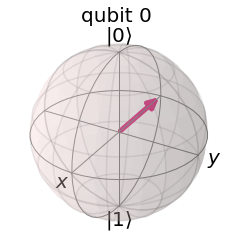

In [18]:
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

Y 게이트는 Y축으로 180도 회전시켜주는 게이트이다.  
위의 하다마드 게이트를 적용한 후 Y게이트를 적용하면 위와 같다. 

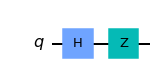

In [19]:
qc = QuantumCircuit(1)
qc.h(0)
qc.z(0)
qc.draw("mpl")

$$Z = \cvec{1 & 0 \\ 0 & -1}$$
$$Z \ket{0} = \ket{0}, Z \ket{1} = -\ket{1}$$

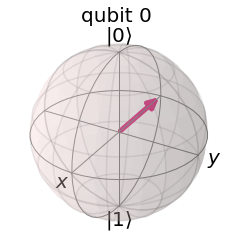

In [20]:
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

Z 게이트는 Z축으로 180도 회전시켜주는 게이트이다.  
위의 하다마드 게이트를 적용한 후 Z게이트를 적용하면 위와 같다. 

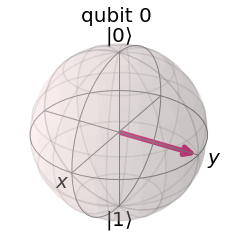

In [21]:
qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

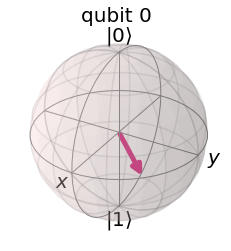

In [22]:
qc = QuantumCircuit(1)
qc.h(0);qc.t(0)
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

S 게이트와 T 게이트는 각각 Z축 방향으로 90도, 45도 회전시켜주는 게이트이다.  
하다마드 게이트를 적용한 후 블락스피어를 살펴보면 위와같다. 

### Rotation Gate
- X,Y,Z 게이트는 각 축 방향으로 180도를 회전시켜주는 게이트이다.  
- 이 게이트 들을 일반화 한 형태인 $R_X(\theta),R_Y(\theta),R_Z(\theta)$ 게이트는 각 축의 방향으로 $\theta$ 만큼 회전시켜주는 게이트이다. 

- 수학적 이론에 기반하여, 임의의 U 방향으로의 $\theta$ 로테이션은 $U^2=U$를 만족할 경우 다음과 같이 쓸 수 있다.  
- $R_U(\theta) = e^{i \frac{\theta}{2} U} = \cos(\theta)I + i\sin(\theta) U$

In [23]:
theta = np.pi/4

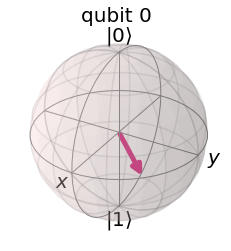

In [25]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(theta,0)
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

- 따라서 이 세 축에 대한 로테이션 게이트를 조합하면 블락스피어 상의 모든 상태를 표현할 수 있다. 

### 4. Quiz

1. $\ket{\psi} = \frac{1}{\sqrt{2}}\ket{0}+e^{i \pi/4}\frac{1}{\sqrt{2}}\ket{1}$를 구현해주는 회로를 구성해라. 
2. 1번에서 짠 회로의 상태를 확인해라.
3. 1번에서 짠 회로의 결과를 시뮬레이션해라.

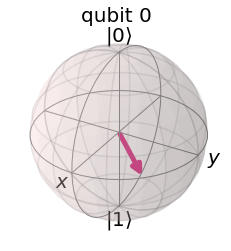

In [33]:
qc = QuantumCircuit(1)
qc.h(0)
qc.rz(theta,0)
qc.save_statevector()
qobj = assemble(qc)
state = backend.run(qobj).result().get_statevector()
plot_bloch_multivector(state)